# This is the data cleaning Notebok for the project

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime

In [2]:
df = pd.read_excel("./marketing_data.xlsx")

## Data Profiling

In [3]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

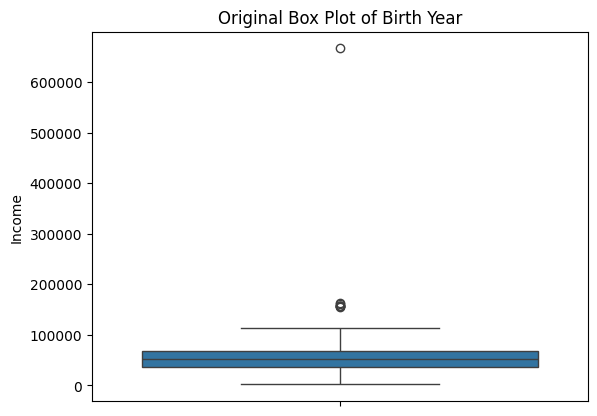

In [4]:
sns.boxplot(df['Income'])
plt.title(f'Original Box Plot of Birth Year')
plt.show()

## Data Preprocessing

In [5]:
# Converting year of birth into age
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
print(df[['Age', 'Year_Birth']])
print(df['Age'].unique())

      Age  Year_Birth
0      54        1970
1      63        1961
2      66        1958
3      57        1967
4      35        1989
...   ...         ...
2235   48        1976
2236   47        1977
2237   48        1976
2238   46        1978
2239   55        1969

[2240 rows x 2 columns]
[ 54  63  66  57  35  70  77  45  65  43  55  47  64  58  48  59  68  49
  53  38  52  50  34  37  40  56  69  41  51  46  72  62  60  42  61  67
  44  79  75  76  71  78  39  32  80  73  36  74  30  31  33 131  28  29
 125  81  83  84 124]


In [6]:
z = np.abs(stats.zscore(df['Age']))
print(z)
threshold_z = 2
print("Original DataFrame Shape:", df.shape)
outlier_indices = np.where(z > threshold_z)[0]
df = df.drop(outlier_indices)
print("DataFrame Shape after Removing Outliers:", df.shape)
print(df['Age'].unique())

0       0.099671
1       0.651494
2       0.901882
3       0.150717
4       1.685463
          ...   
2235    0.600447
2236    0.683910
2237    0.600447
2238    0.767373
2239    0.016208
Name: Age, Length: 2240, dtype: float64
Original DataFrame Shape: (2240, 23)
DataFrame Shape after Removing Outliers: (2206, 23)
[54 63 66 57 35 70 77 45 65 43 55 47 64 58 48 59 68 49 53 38 52 50 34 37
 40 56 69 41 51 46 72 62 60 42 61 67 44 79 75 76 71 78 39 32 73 36 74 33]


In [7]:
# Fixing the format for Dt_customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed')
print(df.shape)
df = df[(df['Dt_Customer'].dt.year - df['Year_Birth']) > 18]
print(df.shape)
df['Dt_Customer'] = df['Dt_Customer'].astype(str)
print(df)

(2206, 23)
(2206, 23)
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntSweetProducts  \
0            0  2014-06-16        0      

## Filling all null income values

In [8]:
df['Income'].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

In [9]:
# Graduation = df[df['Education'] == 'Graduation']
# Graduation.head(50)

unique_values = df['Education'].unique()
print(unique_values)

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [10]:
Graduation_mean = df[df['Education'] == 'Graduation']
Graduation_mean = Graduation_mean['Income'].mean()
print(Graduation_mean)

52510.216878402905


In [11]:
PhD_mean = df[df['Education'] == 'PhD']
PhD_mean = PhD_mean['Income'].mean()
print(PhD_mean)

55950.40677966102


In [12]:
TwoN_Cycle_mean = df[df['Education'] == '2n Cycle']
TwoN_Cycle_mean = TwoN_Cycle_mean['Income'].mean()
print(TwoN_Cycle_mean)

47479.18974358974


In [13]:
Master_mean = df[df['Education'] == 'Master']
Master_mean = Master_mean['Income'].mean()
print(Master_mean)

52761.880886426596


In [14]:
Basic_mean = df[df['Education'] == 'Basic']
Basic_mean = Basic_mean['Income'].mean()
print(Basic_mean)

20417.30188679245


In [15]:
null_income = df[df['Income'].isnull()]
# null_income = null_income.isnull().sum()
null_income['Income'][null_income['Education'] == 'Graduation'] = Graduation_mean
null_income['Income'][null_income['Education'] == 'PhD'] = PhD_mean
null_income['Income'][null_income['Education'] == '2n Cycle'] = TwoN_Cycle_mean
null_income['Income'][null_income['Education'] == 'Master'] = Master_mean
null_income['Income'][null_income['Education'] == 'Basic'] = Basic_mean
print(null_income)

         ID  Year_Birth   Education Marital_Status        Income  Kidhome  \
134    8996        1957         PhD        Married  55950.406780        2   
262    1994        1983  Graduation        Married  52510.216878        1   
394    3769        1972         PhD       Together  55950.406780        1   
449    5255        1986  Graduation         Single  52510.216878        1   
525    8268        1961         PhD        Married  55950.406780        0   
590   10629        1973    2n Cycle        Married  47479.189744        1   
899   10475        1970      Master       Together  52761.880886        0   
997    9235        1957  Graduation         Single  52510.216878        1   
1096   4345        1964    2n Cycle         Single  47479.189744        1   
1185   7187        1969      Master       Together  52761.880886        1   
1213   8720        1978    2n Cycle       Together  47479.189744        0   
1312   8557        1982  Graduation         Single  52510.216878        1   

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_6368\1739440520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_income['Income'][null_income['Education'] == 'Graduation'] = Graduation_mean
C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_6368\1739440520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_income['Income'][null_income['Education'] == 'PhD'] = PhD_mean
C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_6368\1739440520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [16]:
df['Income'][df['Income'].isnull()] = null_income['Income']
df.head(50)

C:\Users\Lex Zedrick Lorenzo\AppData\Local\Temp\ipykernel_6368\140808848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'][df['Income'].isnull()] = null_income['Income']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,66
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,0,1,1,0,2,7,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,0,34,2,3,1,2,7,1,0,35
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,32,43,1,4,7,5,2,1,0,66
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,34,65,1,10,10,7,6,1,0,70
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,7,1,2,1,3,5,0,0,57
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,32,5,3,6,2,9,4,0,0,70
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01,0,384,...,32,5,3,6,2,9,4,0,0,70


In [17]:
def addParentToSize(marital_status, Family_Size):
    if marital_status in ('Together', 'Married'):
        return Family_Size + 2
    else:
        return Family_Size + 1

In [18]:
df['Family_Size'] = df['Teenhome'] + df['Kidhome']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family_Size
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,78,2,5,2,11,4,0,0,48,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,16,1,1,0,3,8,0,0,47,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,14,2,6,1,5,8,0,0,48,1
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,63,1,5,4,10,3,0,0,46,0


In [19]:
df['Family_Size'] = df.apply(lambda row: addParentToSize(row['Marital_Status'], row['Family_Size']), axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Family_Size
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,3
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,78,2,5,2,11,4,0,0,48,2
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,16,1,1,0,3,8,0,0,47,3
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,14,2,6,1,5,8,0,0,48,2
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,63,1,5,4,10,3,0,0,46,2


## Saving the cleaned data

In [20]:
df.to_excel('Cleaned_Date.xlsx')